# Решающие деревья

Решающие деревья - это семейство алгоритмов, которые очень сильно отличаются от линейный моделей, но в то же время играют важную роль в машинном обучении

## Пример 1

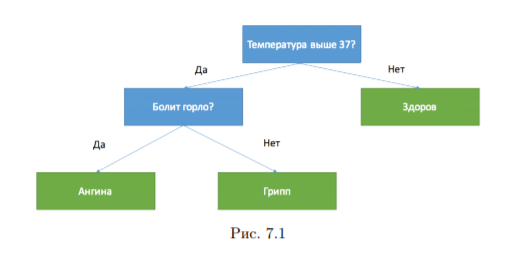

## Пример 2

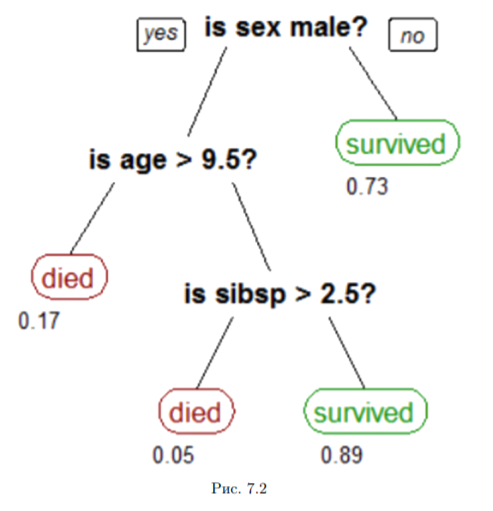

В вершине дерева записано условие, а в листе - прогноз

## Условие

Условие выбирается очень простое:

$$\Large [x^j \leq t]$$

Надо проверить значение определенное признака, и если значение лежит левее порога $t$, то идем в левую ветвь, иначе - в правую

## Регрессия

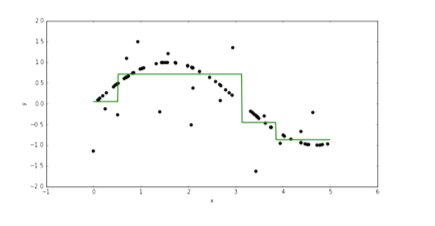

### Переобучение
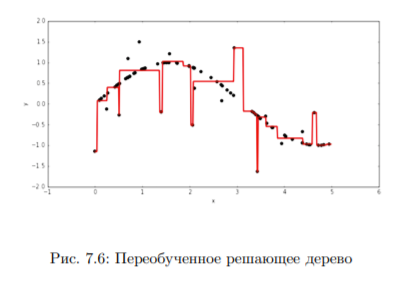

## Классификация

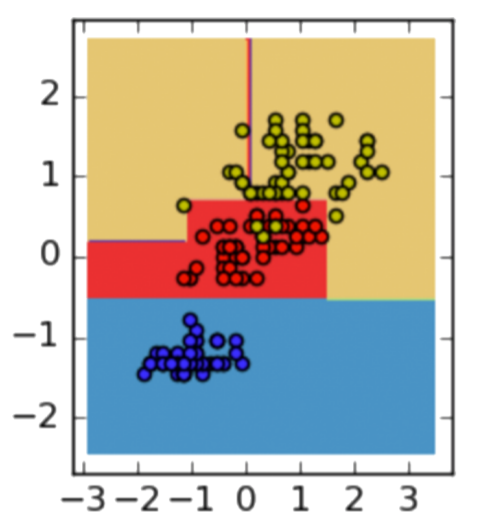

### Переобучение

Модель подогналась к каждому объекту: в каждом листе находится каждый объект
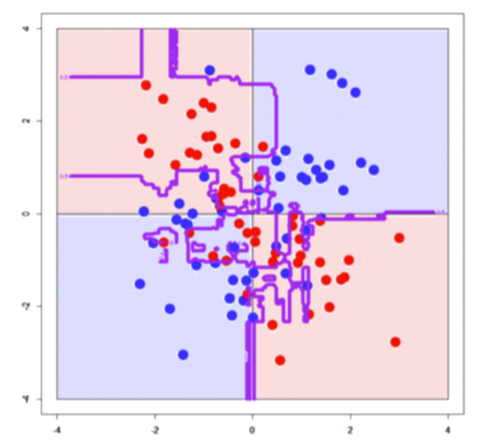

***Основная проблема в решающих деревьях - легкое переобучение***

# 7.2 Обучение решающих деревьев

## 7.2.1 Жадный способ построения

В машинном обучении применяется жадный способ построения деревьев от корня к листьям. Сначала выбирается корень, который разбивает выборку на две. Тоже самое происходит с каждой вершиной, пока этого будет недостаточно.

Пусть в вершину $m$ попало множество $X_m$ объектов из обучающей выборки. Параметры условия $[x^j < t]$ выбраны так, чтобы минимизировать критерий ошибки $Q(X_m,j,t)$, зависящий от этих параметров:

$$\Large Q(X_m, j, t) \rightarrow min$$

---
После того как параметры были выбраны, множество $X_m$ из обучающей выборки разбивается на два подмножества:

$X_l = \{x \in X_m|[x^j \leq t]\}$

$X_r = \{x \in X_m|[x^j > t]\}$

Предложенную процедуру можно продолжить для каждой из дочерних вершин: в этом случае дерево
будет все больше и больше углубляться. Такой процесс рано или поздно должен остановиться, и очередная
дочерняя вершина будет объявлена листком, а не разделена пополам. Этот момент определяется критерием
остановки. Существует много различных вариантов критерия остановки:

- Если в вершину попал только один объект обучающей выборки или все объекты принадлежат одному
классу (в задачах классификации), дальше разбивать не имеет смысла.

- Можно также останавливать разбиение, если глубина дерева достигла определенного значения.

Если вершина не была поделена, а объявлена листом, то можно сделать прогноз.

В случае **регрессии**, если функционал - среднеквадратичная регрессия, оптимально выбрать средний ответ на этой выборке:

$$a_m = \frac{1}{|X_m|}\sum_{i \in X_m} y_i$$

В задаче **классификации** оптимально возвращать тот класс, который наиболее популярен среди объектов в $X_m$:

$$\Large a_m = argmax\sum_{i \in X_m}[y_i = y]$$

Если требуется **указать вероятности классов**, их можно указать как долю объектов разных классов в $X_m$:

$$\Large a_{mk} = \frac{1}{|X_m|}\sum_{i \in X_m}[y_i = k]$$

# 7.3 Критерий информативности

## 7.3.1. Выбор критерия ошибки

Критерий ошибки записывается следующи образом:

$$\Large Q(X_m, j, t) = \frac{X_{\ell}}{X_m}H(X_{\ell}) + \frac{X_r}{X_m}H(X_r)$$

критерий ошибки состоит из двух слагаемых, каждый из которых относится к своему листу

$H(X)$ - **критерий информативности**: ее значение должно быть тем меньше, чем меньше разброс ответов в $X$

#### Регрессия

В случае регрессии разброс ответов - дисперсия:

$$\Large H(X) = \frac{1}{|X|}\sum_{i \in X}(y_i - \overline{y}(X))^2$$

$$\Large \overline{y} = \frac{1}{|X|}\sum_{i \in X} y_i$$

## 7.3.2. Критерий информативности Джини

Сформулировать критерий информативности для задачи классификации немного сложнее. 

Добавим параметр $p_k$ - доля объектов класса $k$ в выборке $X$:

$$\Large p_k = \frac{1}{|X|}\sum_{i \in X}[y_i=k]$$

**Критерий информативности Джини:**

$$\Large H(X) = \sum_{k=1}^K p_k(1 - p_k)$$

- $H(X) \geq 0.$

- Оптимум достигается тогда, когда все объекты относятся к одному классу: $H(X) = 0$

***Одна из интерпретаций критерия Джини - это вероятность ошибки случайного классификатора. Классификатор устроен таким образом, что вероятность выдать класс $p$ равна $p_k$***

## 7.3.3. Энтропийный критерий информативности

$$\Large H(X) = -\sum_{k=1}^Kp_kln(p_k)$$

- Полагается, что $0ln0 = 0$

- $H(X) \geq 0$

- Оптимум достигается когда все объекты относятся к одному классу. $H(X)=0$

***Энтропийный критерий имеет интересный физический смысл. Он заключается в том, что показывает, насколько распределение классов в $X$ отличается от вырожденного. Энтропия в случае вырожденного распределения равна 0: такое распределение характеризуется минимальной степенью неожиданности. Напротив, равномерное распределение самое неожиданное, и ему соответствует максимальная энтропия***

# 7.4. Критерий останова и стрижка деревьев

В этом разделе пойдет речь о способах борьбы с переобучением

## 7.4.1 Критерий останова

Критерий останова используется, чтобы принять решение: разбивать вершину дальше или сделать ее листовой.

Худший случай решающего дерево - это когда каждому листу соответствует один объект в обучающей выборке. В этом случае дерево максимально переобучено. Грамотно подобранный критерий останова позволяет бороться с переобучением.

1) Самый простой критерий останова проверяет, **все ли объекты в вершине относятся к одному классу**.
Однако такой критерий останова может быть использован только в случае простых выборок, так как для
сложных он остановится только тогда, когда в каждом листе останется примерно по одному объекту

2) Гораздо более устойчивый и полезный критерий проверяет, **сколько объектов оказалось в вершине**, и
разбиение продолжается, если это число больше, чем некоторое выбранное $n$. Соответственно, если в вершину
попало ≤ $n$ объектов, она становится листовой. Параметр n нужно подбирать.

Случай $n = 1$ является худшим случаем, описанным выше. При этом выбирать $n$ нужно так, чтобы по $n$
объектам, которые попали в вершину, можно было устойчиво построить прогноз. *Существует рекомендация,
что $n$ нужно брать равным 5.*

3) Еще один критерий, гораздо более грубый, заключается **в ограничении на глубину дерева**. Этот критерий
хорошо себя зарекомендовал при построении композиций, когда много решающих деревьев объединяют в
один сложный алгоритм

## 7.4.2. Стрижка деревьев

Он заключается в том, что сначала строится решающее дерево максимальной сложности и глубины, до тех пор, пока в каждой вершине
не окажется по 1 объекту обучающей выборки.

После этого начинается «стрижка», то есть удаление листьев в этом дереве по определенному критерию. Например, можно стричь до тех пор, пока улучшается качество некоторой отложенной выборки.

*Стрижка работает гораздо лучше, чем простые критерии, о которых говорилось раньше.* Но стрижка — очень ресурсоёмкая процедура, так как, например, может потребоваться вычисление качества дерева на некоторой валидационной выборке на
каждом шаге.

***На самом деле, сами по себе деревья на сегодняшний день почти не используются, они бывают нужны
только для построения композиции и объединения большого числа деревьев в один алгоритм. В случае с
композициями такие сложные подходы к борьбе с переобучением уже не нужны, так как достаточно простых
критериев останова, ограничения на глубину дерева или на число объектов в листе.***